In [4]:
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt

# Load the TSLA data
tsla_data = pd.read_csv("data/TSLA.csv")
tsla_data["Date"] = pd.to_datetime(tsla_data["Date"])
tsla_data.set_index("Date", inplace=True)

class MA_Crossover(bt.Strategy):
    # Define the parameters for the strategy
    params = (('short_period', 10), ('long_period', 50),)
    
    def __init__(self):
        # Initialize moving averages
        self.short_ma = bt.indicators.ExponentialMovingAverage(self.data.close, period=self.params.short_period)
        self.long_ma = bt.indicators.ExponentialMovingAverage(self.data.close, period=self.params.long_period)
    
    def next(self):
        # Calculating the difference between short and long moving averages
        diff = self.short_ma[0] - self.long_ma[0]
        short_average_var = self.short_ma[0] - self.short_ma[-1] if len(self.data) > 1 else 0

        # Buy if short MA is above long MA and increasing
        if diff > 0 and short_average_var > 0 and not self.position:
            self.buy()

        # Sell if short MA is below long MA and decreasing
        elif diff < 0 and short_average_var < 0 and self.position:
            self.sell()

# Prepare the data for Backtrader
class PandasData(bt.feeds.PandasData):
    # Use adjusted close data
    lines = ('adj_close',)
    params = (('adj_close', 5),)

# Instantiate Cerebro engine
cerebro = bt.Cerebro()

# Add strategy
cerebro.addstrategy(MA_Crossover)

# Feed data to Cerebro
data = PandasData(dataname=tsla_data)
cerebro.adddata(data)

# Set initial capital
cerebro.broker.setcash(10000)

# Set commission
cerebro.broker.setcommission(commission=0)

# Run the backtest
results = cerebro.run()

# Print final portfolio value
print(f"Final Portfolio Value: {cerebro.broker.getvalue()}")



Final Portfolio Value: 10081.480017999995


<IPython.core.display.Javascript object>

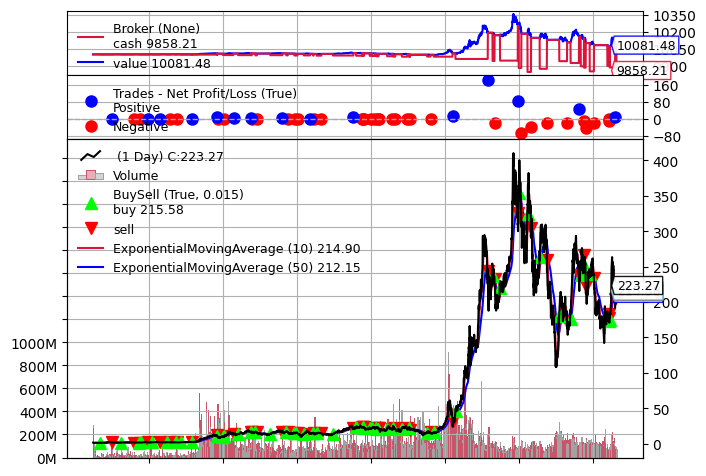

In [23]:
%matplotlib inline
cerebro.plot()[0][0]

# Testando MACD
Vamos fazer outro teste clássico para ver como alguns dos outros indicadores funcionam

In [18]:
class MACD(bt.Strategy):
    # Define the parameters for the strategy
    params = (
        ('short_period', 12),  
        ('long_period', 26),
        ('signal_period', 9),  
    )

    def __init__(self):
        # Initialize the MACD components with correct parameter names
        self.macd = bt.indicators.MACD(
            self.data.close, 
            period_me1=self.params.short_period,  # Fast (short) moving average
            period_me2=self.params.long_period,   # Slow (long) moving average
            period_signal=self.params.signal_period  # Signal line period
        )

    def next(self):
        # Calculate the MACD value and the signal line
        macd_value = self.macd.macd[0]
        signal_line = self.macd.signal[0]
        hist = self.macd.histo[0]  # The MACD histogram (difference between MACD and signal)

        # Buy if the MACD crosses above the signal line (bullish crossover)
        if macd_value > signal_line and not self.position:
            self.buy()

        # Sell if the MACD crosses below the signal line (bearish crossover)
        elif macd_value < signal_line and self.position:
            self.sell()


In [19]:
# Instantiate Cerebro engine 
cerebro_MACD = bt.Cerebro()

# Add strategy
cerebro_MACD.addstrategy(MACD)

# Feed data to Cerebro using the adjusted close price
data = PandasData(dataname=tsla_data)
cerebro_MACD.adddata(data)

# Set initial capital
cerebro_MACD.broker.setcash(10000)

# Set commission
cerebro_MACD.broker.setcommission(commission=0)

# Run the backtest
results = cerebro_MACD.run()

# Print final portfolio value
print(f"Final Portfolio Value: {cerebro_MACD.broker.getvalue()}")

# Plotting the results (optional but helpful for visualizing the strategy)
cerebro_MACD.plot()


AttributeError: 'Lines_LineSeries_LineIterator_DataAccessor_Indicat' object has no attribute 'histo'